## 뉴럴네트워크 (회귀)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

In [ ]:
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y_train = np.array([9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

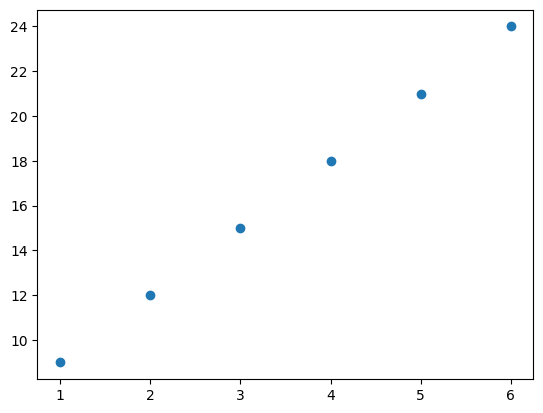

In [ ]:
plt.scatter(x_train, y_train)

## 2. 사이킷런 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # wx + b -> 파라미터: w,b
lr.fit(x_train.reshape(-1, 1), y_train) # 2차원 배열로 변환
# -1: 행의 개수 자동 결정, 1: 열의 개수 지정

LinearRegression()

In [ ]:
lr.coef_, lr.intercept_ # ax+b에서 각각 a,b 값

(array([3.]), 5.999999999999998)

### 예측

In [ ]:
lr.predict([[10.0]]) # 입력도 2차원으로 해야 함

array([36.])

## 3. 뉴럴 네트워크 사용

### 모델 구성

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1),
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### 컴파일
- 손실함수
- 경사하강법 (optimizer)
- 메트릭스

In [ ]:
model.compile(
    optimizer = 'sgd',
    loss = 'mse', # 선형 회귀 -> mse
    metrics = ['mse']
)

In [ ]:
EPOCHS = 300

model.fit(
    x_train, y_train,
    epochs = EPOCHS,
    batch_size = len(x_train)
)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 454.1051 - mse: 454.1051
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 212.5164 - mse: 212.5164
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 100.6849 - mse: 100.6849
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 48.9089 - mse: 48.9089
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 24.9286 - mse: 24.9286
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13.8131 - mse: 13.8131
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.6520 - mse: 8.6520
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.2468 - mse: 6.2468
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.1172 - mse: 5.1172
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5782 - mse: 4.5782
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.3127 - mse: 4.3127
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.1738 - mse: 4.1738
Epoch 13/300
1/1 ━━━━━━━━━━━━━

In [ ]:
# 학습 파라미터 확인
model.get_weights() # w -> 3.853~, b -> 2.3479~

[array([[3.37389]], dtype=float32), array([4.3993034], dtype=float32)]

### 예측

In [ ]:
model.predict(np.array([10.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[38.138203]], dtype=float32)